<a href="https://colab.research.google.com/github/ShafinMz08/Semiconductor-Yield-Prediction-Model/blob/main/SYPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Semiconductor Manufacturing Process

## Overview

### **Domain**: Semiconductor Manufacturing Process  
This project focuses on analyzing sensor data collected during a complex semiconductor manufacturing process. The goal is to predict the Pass/Fail yield of production entities while identifying the most relevant signals (features) contributing to the process outcome. Feature selection and data preprocessing play a critical role in reducing noise, improving model accuracy, and optimizing manufacturing efficiency.

---

### **Project Objectives**
1. Build a classifier to predict whether a production entity will pass or fail based on sensor data.
2. Analyze and determine whether all features are required for the model or if feature selection can improve performance.
3. Apply preprocessing techniques such as missing value imputation, feature scaling, and target balancing to prepare the dataset for machine learning.

---

### **Dataset Description**
- **File**: `signal-data.csv`  
- **Size**: 1567 rows and 592 columns (591 features + 1 target variable)  
- **Details**:
  - Each row represents a production entity.
  - Each column corresponds to a signal or measurement point.
  - The target variable (`Pass/Fail`):
    - `-1`: Pass
    - `1`: Fail
  - Includes a timestamp column (`Time`) for temporal analysis.

## Data Import and Exploration
- **Objective**: Load the dataset and understand its structure.
- **Actions**:
  - Loaded the dataset `signal-data.csv`.
  - Checked for missing values and identified columns with high missing percentages (>50%).
- **Outcome**:
  - Dropped columns with excessive missing values to simplify preprocessing.


In [2]:
from google.colab import files
uploaded = files.upload()


Saving signal-data.csv to signal-data.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('signal-data.csv')


## Data Cleansing
- **Objective**: Handle missing values and remove unnecessary data.
- **Actions**:
  - Dropped columns with >50% missing values.
  - Imputed missing values:
    - Numerical columns: Replaced missing values with the mean.
    - Categorical columns: Replaced missing values with the mode.
  - Verified that no missing values remained.
- **Outcome**:
  - Cleaned dataset is ready for further analysis.


In [8]:
# Check for the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Identify columns with high missing values (e.g., >50% missing)
high_missing_cols = missing_percentage[missing_percentage > 50].index.tolist()

# Summarize columns with high missing values
high_missing_summary = {
    "total_high_missing_cols": len(high_missing_cols),
    "high_missing_cols": high_missing_cols
}

# Display the top 10 columns with the highest missing values percentage
top_missing_cols = missing_percentage.sort_values(ascending=False).head(10)

high_missing_summary, top_missing_cols


({'total_high_missing_cols': 28,
  'high_missing_cols': ['72',
   '73',
   '85',
   '109',
   '110',
   '111',
   '157',
   '158',
   '220',
   '244',
   '245',
   '246',
   '292',
   '293',
   '345',
   '346',
   '358',
   '382',
   '383',
   '384',
   '492',
   '516',
   '517',
   '518',
   '578',
   '579',
   '580',
   '581']},
 158    91.193363
 292    91.193363
 293    91.193363
 157    91.193363
 85     85.577537
 492    85.577537
 220    85.577537
 358    85.577537
 517    64.964901
 245    64.964901
 dtype: float64)

In [9]:
# Drop columns with >50% missing values
data_cleaned = data.drop(columns=high_missing_cols)

# Confirm the new shape of the dataset
print(f"New dataset shape after dropping columns: {data_cleaned.shape}")



New dataset shape after dropping columns: (1567, 564)


In [10]:
# Impute numerical columns with the mean
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].mean())

# Impute categorical columns (if any) with the mode
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])



In [11]:
# Check for any remaining missing values
print(f"Remaining missing values: {data_cleaned.isnull().sum().sum()}")


Remaining missing values: 0


### Data Cleansing: Removing Duplicate Records
- **Objective**: Ensure the dataset does not contain redundant information.
- **Actions**:
  - Checked for duplicate rows in the dataset.
  - Identified the number of duplicate records.
  - Removed duplicate rows to maintain data integrity.
- **Outcome**:
  - The dataset is free of duplicate records, ensuring accuracy in analysis.


In [41]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")


Number of duplicate records: 0


In [42]:
print(data.dtypes)  # Look for 'datetime64[ns]' or similar data types


Time            datetime64[ns]
0                      float64
1                      float64
2                      float64
3                      float64
                     ...      
Pass/Fail              float64
day_of_week             object
hour                     int32
elapsed_time           float64
day_of_week             object
Length: 596, dtype: object


In [43]:
print(data.columns)


Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '585', '586', '587', '588', '589', 'Pass/Fail', 'day_of_week', 'hour',
       'elapsed_time', 'day_of_week'],
      dtype='object', length=596)


## Feature Engineering: Time-Based Features
- **Objective**: Extract meaningful information from the `Time` column to provide additional insights for analysis.
- **Actions**:
  - Converted the `Time` column to datetime format.
  - Created new features:
    - **Day of the Week**: Captures weekly patterns.
    - **Hour**: Captures daily trends.
    - **Elapsed Time**: Measures relative time from the earliest timestamp.
- **Outcome**:
  - The dataset now includes additional temporal features, which may improve the model's ability to capture trends.


In [44]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')


In [46]:
new_columns = pd.DataFrame({
    'day_of_week': data['Time'].dt.day_name()
})
data = pd.concat([data, new_columns], axis=1)


In [47]:
data = data.copy()
data['day_of_week'] = data['Time'].dt.day_name()


In [48]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
data['day_of_week'] = data['Time'].dt.day_name()


In [49]:
data.to_csv('processed_data.csv', index=False)


In [50]:
data['hour'] = data['Time'].dt.hour


In [51]:
# Check for duplicate records
duplicates = data.duplicated()

# Count the number of duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")

# Preview the duplicate rows, if any
print(data[duplicates])


Number of duplicate rows: 0
Empty DataFrame
Columns: [Time, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, ...]
Index: []

[0 rows x 597 columns]


In [52]:
data['elapsed_time'] = (data['Time'] - data['Time'].min()).dt.total_seconds()


In [53]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,586,587,588,589,Pass/Fail,day_of_week,hour,elapsed_time,day_of_week,day_of_week
0,2008-07-19 11:55:00,0.469231,0.589292,0.499096,0.379841,0.000609,0.0,0.328562,0.965785,0.665019,...,NaN,NaN,NaN,NaN,0.0,Saturday,11,16710780.0,Saturday,Saturday
1,2008-07-19 12:32:00,0.575003,0.445535,0.666763,0.393982,0.000133,0.0,0.428942,0.969673,0.656639,...,0.221387,0.220339,0.181159,0.282386,0.0,Saturday,12,16713000.0,Saturday,Saturday
2,2008-07-19 13:17:00,0.308868,0.583388,0.493903,0.457065,0.000744,0.0,0.283455,0.965008,0.542759,...,0.629073,0.589309,0.500000,0.112383,1.0,Saturday,13,16715700.0,Saturday,Saturday
3,2008-07-19 14:43:00,0.400385,0.466998,0.543479,0.244894,0.000574,0.0,0.469123,0.946345,0.638590,...,0.309942,0.152542,0.123188,0.100153,0.0,Saturday,14,16720860.0,Saturday,Saturday
4,2008-07-19 15:22:00,0.471367,0.500400,0.678327,0.357067,0.000765,0.0,0.387631,0.960342,0.670606,...,0.309942,0.152542,0.123188,0.100153,0.0,Saturday,15,16723200.0,Saturday,Saturday


## Target Variable Exploration
- **Objective**: Understand the distribution of the `Pass/Fail` target variable and balance it.
- **Actions**:
  - Analyzed the percentage distribution of `Pass` and `Fail`.
  - Applied SMOTE to balance the target classes.
- **Outcome**:
  - The dataset is balanced and ready for train-test splitting.


In [12]:
# Explore the target variable 'Pass/Fail'
target_balance = data_cleaned['Pass/Fail'].value_counts(normalize=True) * 100

# Display the distribution of the target variable
target_distribution = data_cleaned['Pass/Fail'].value_counts()

target_balance, target_distribution


(Pass/Fail
 -1    93.363114
  1     6.636886
 Name: proportion, dtype: float64,
 Pass/Fail
 -1    1463
  1     104
 Name: count, dtype: int64)

In [13]:
!pip install imbalanced-learn

In [14]:
from imblearn.over_sampling import SMOTE

# Separate predictors and target
X = data_cleaned.drop(columns=['Pass/Fail', 'Time'], errors='ignore')
y = data_cleaned['Pass/Fail']

# Apply SMOTE for balancing the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new target distribution after balancing
balanced_target_distribution = y_resampled.value_counts()

X_resampled.shape, balanced_target_distribution


((2926, 562),
 Pass/Fail
 -1    1463
  1    1463
 Name: count, dtype: int64)

In [15]:
# Separate predictors (X) and target (y)
X = data_cleaned.drop(columns=['Pass/Fail', 'Time'], errors='ignore')  # Remove target and non-relevant columns
y = data_cleaned['Pass/Fail']

# Confirm the shapes of X and y
print(f"Predictors shape: {X.shape}")
print(f"Target shape: {y.shape}")


Predictors shape: (1567, 562)
Target shape: (1567,)


## Train-Test Split and Scaling
- **Objective**: Prepare the data for machine learning by splitting and scaling.
- **Actions**:
  - Performed an 80-20 stratified train-test split.
  - Standardized features using `StandardScaler` to ensure uniform scaling.
- **Outcome**:
  - Training and testing datasets are prepared with scaled features.


In [16]:
from sklearn.model_selection import train_test_split

# Perform train-test split on the balanced data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Confirm the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2340, 562)
X_test shape: (586, 562)
y_train shape: (2340,)
y_test shape: (586,)


In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


## Data Preprocessing: Normalization of Numerical Features
- **Objective**: Scale numerical features to ensure all features have comparable ranges.
- **Actions**:
  - Applied Min-Max Scaling to normalize numerical columns between 0 and 1.
  - Ensured that all features contribute equally to model training.
- **Outcome**:
  - The scaled dataset is ready for model training, improving the stability and performance of algorithms.


In [54]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [57]:
data.to_csv('preprocessed_data.csv', index=False)


## Data Visualization
- **Objective**: Validate that feature distributions remain consistent across splits.
- **Actions**:
  - Visualized the distribution of a selected feature across the original dataset, training set, and test set.
- **Outcome**:
  - Confirmed that feature distributions are consistent across splits.


Original Dataset Stats:
                  0            1            2            3            4  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean   3007.859689  2496.256970  2199.942164  1374.543110     2.847075   
std      71.955701    71.057958    27.125623   375.449052    41.076580   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2959.860000  2458.885000  2181.667984  1106.427437     1.070000   
50%    2997.888710  2499.150854  2198.221934  1288.085700     1.309204   
75%    3048.412500  2534.371113  2215.179807  1572.469800     1.486900   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  2926.0  2926.000000  2926.000000  2926.000000  2926.000000  ...   
mean    100.0   101.152701     0.122026     1.467282    -0.001848  ...   
std       0.0     5.248408     0.006627     0.062884     0.013460  ...   
min     100.

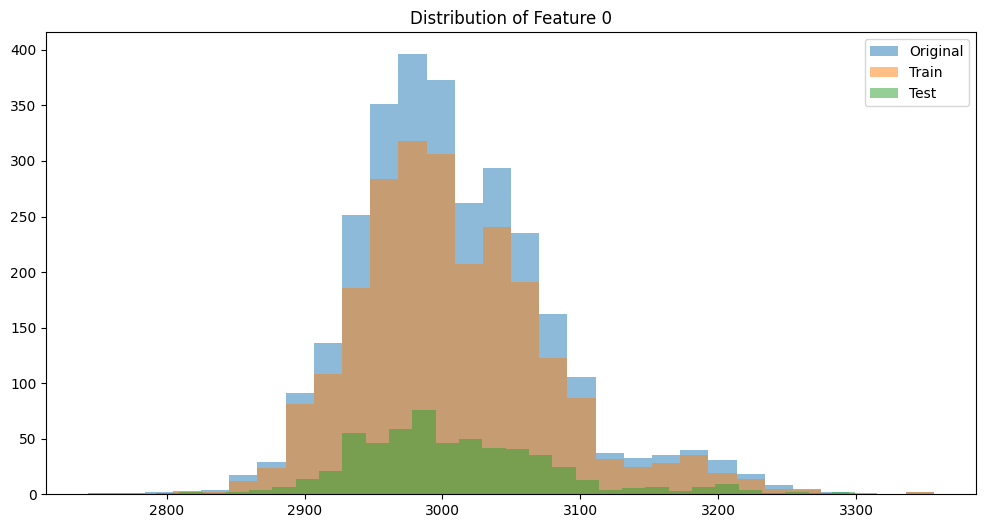

In [35]:
# Compare descriptive statistics
original_stats = X_resampled.describe()
train_stats = X_train.describe()
test_stats = X_test.describe()

# Display a summary comparison
print("Original Dataset Stats:\n", original_stats)
print("\nTraining Dataset Stats:\n", train_stats)
print("\nTesting Dataset Stats:\n", test_stats)

# Compare distributions visually
import matplotlib.pyplot as plt

feature_to_compare = '0'  # Replace with any feature name or index
plt.figure(figsize=(12, 6))
plt.hist(X_resampled[feature_to_compare], bins=30, alpha=0.5, label='Original')
plt.hist(X_train[feature_to_compare], bins=30, alpha=0.5, label='Train')
plt.hist(X_test[feature_to_compare], bins=30, alpha=0.5, label='Test')
plt.legend()
plt.title(f"Distribution of Feature {feature_to_compare}")
plt.show()
